# Chicago Crimes

In [1]:
import pandas as pd

# Load Data: 
df = pd.read_csv("Crimes_-_2001_to_Present.csv")

- **Explore File Structure**

In [3]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11243268,JB167760,01/01/2017 12:01:00 AM,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1896258,G749215,12/15/2001 02:00:00 AM,011XX N STATE ST,0460,BATTERY,SIMPLE,STREET,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.dtypes

ID                              int64
Case Number                    object
Date                           object
Block                          object
IUCR                           object
Primary Type                   object
Description                    object
Location Description           object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                      float64
Ward                          float64
Community Area                float64
FBI Code                       object
X Coordinate                  float64
Y Coordinate                  float64
Year                            int64
Updated On                     object
Latitude                      float64
Longitude                     float64
Location                       object
Historical Wards 2003-2015    float64
Zip Codes                     float64
Community Areas               float64
Census Tracts                 float64
Wards       

In [7]:
df.shape

(7856203, 30)

### **Comparing Police Districts**

In [8]:
# Group by police district and calculate total crimes
district_crime_counts = df['District'].value_counts()

In [9]:
# Identify the district with the most crimes and the district with the least
most_crimes_district = district_crime_counts.idxmax()
least_crimes_district = district_crime_counts.idxmin()

print(f"District with the most crimes: {most_crimes_district}")
print(f"District with the least crimes: {least_crimes_district}")

District with the most crimes: 8.0
District with the least crimes: 21.0


- The output **"District with the most crimes: 8.0"** means that District 8 has the highest number of reported crimes in the dataset.

- The output **"District with the least crimes: 21.0"** means that District 21 has the lowest number of reported crimes in the dataset.

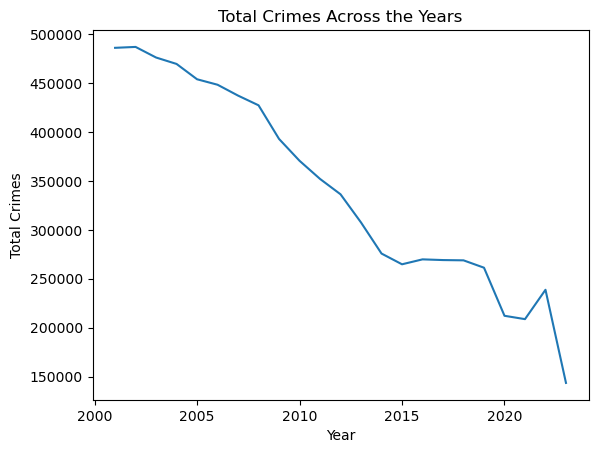

In [10]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by year and calculate total crimes
yearly_crime_counts = df['Year'].value_counts().sort_index()

# Plot a line chart
import matplotlib.pyplot as plt

plt.plot(yearly_crime_counts.index, yearly_crime_counts.values)
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.title('Total Crimes Across the Years')
plt.show()

- **Identify individual crimes with opposite trends (decreasing when overall crime is increasing or vice-versa)**

The y-axis "Total crimes" indicates the total number of reported crimes, with values starting at 500,000 and decreasing to 150,000. This indicates a decrease in the total number of reported crimes over the years.

The x-axis "Year" represents the years from 2001 to 2023. The line starts from above the y-axis at the year 2001 and descends to the present year, 2023. This descending line visually reinforces the decrease in total reported crimes.

### Comparing AM vs. PM Rush Hour

In [38]:
# Create a new column indicating AM or PM rush hour
df['Hour'] = df['Date'].dt.hour
print(df["Hour"].head())

0     0
1     0
2     0
3     2
4    10
Name: Hour, dtype: int64


In [39]:
# Create columns for AM and PM rush hours
df['AM_Rush_Hour'] = (df['Hour'] >= 7) & (df['Hour'] < 10)
df['PM_Rush_Hour'] = (df['Hour'] >= 16) & (df['Hour'] < 19)

In [40]:
print(df["AM_Rush_Hour"].head())

0    False
1    False
2    False
3    False
4    False
Name: AM_Rush_Hour, dtype: bool


In [41]:
print(df["PM_Rush_Hour"].head())

0    False
1    False
2    False
3    False
4    False
Name: PM_Rush_Hour, dtype: bool


In [42]:
# Group by crime type and calculate common crimes during AM and PM rush hours
rush_hour_crime_counts = df.groupby(['Primary Type', 'AM_Rush_Hour', 'PM_Rush_Hour'])['ID'].count().unstack()

In [43]:
# Filter the DataFrame for AM and PM rush hours
am_rush_hour_df = df[df['AM_Rush_Hour']]
pm_rush_hour_df = df[df['PM_Rush_Hour']]

# Group by crime type and calculate common crimes during AM and PM rush hours
am_rush_hour_counts = am_rush_hour_df['Primary Type'].value_counts().head(5)
pm_rush_hour_counts = pm_rush_hour_df['Primary Type'].value_counts().head(5)

In [44]:
# Print top 5 most common crimes during AM and PM rush hours
print("Top 5 crimes during AM rush hour:")
print(am_rush_hour_counts)

Top 5 crimes during AM rush hour:
THEFT              188395
BATTERY            110513
CRIMINAL DAMAGE     82911
BURGLARY            74423
OTHER OFFENSE       63487
Name: Primary Type, dtype: int64


**Top 5 Crimes During AM Rush Hour:**

- **<span style="color: red">THEFT:</span>**  Theft is the most common crime during AM rush hours. This could indicate that individuals might be more prone to stealing or engaging in theft-related activities during the morning rush.


- **<span style="color: red">BATTERY:</span>** Battery is the second most common crime. This suggests that incidents involving physical harm or violence are also relatively frequent during the morning rush.



- **<span style="color: red">CRIMINAL DAMAGE:</span>** The third highest count is for criminal damage. This might include acts of vandalism or property damage, which could be influenced by increased activity during the morning commute.


- **<span style="color: red">BURGLARY:</span>** Burglary, which involves unauthorized entry into a building, is also quite common. This could be related to opportunist criminal behavior when people are leaving their homes for work.


- **<span style="color: red">OTHER OFFENSE:</span>** This category includes a variety of non-specific offenses. It could indicate a range of activities, such as disorderly conduct or public disturbances, happening during the morning rush.



In [45]:
print("\nTop 5 crimes during PM rush hour:")
print(pm_rush_hour_counts)


Top 5 crimes during PM rush hour:
THEFT              299035
BATTERY            216832
CRIMINAL DAMAGE    136698
NARCOTICS          103479
ASSAULT             91897
Name: Primary Type, dtype: int64


**Top 5 Crimes During PM Rush Hour:** 

- **<span style="color: red">THEFT:</span>** Similar to AM rush hours, theft remains the most common crime during the evening rush. This may suggest that theft-related activities continue to be prevalent throughout the day.


- **<span style="color: red">BATTERY:</span>** Battery also maintains its position as the second most common crime during PM rush hours. This indicates that incidents of violence remain consistent between the two rush hour periods.


- **<span style="color: red">CRIMINAL DAMAGE:</span>** Again, criminal damage ranks third. This suggests that property damage and vandalism continue to occur during the evening rush.


- **<span style="color: red">NARCOTICS:</span>** Interestingly, narcotics-related incidents are more common during PM rush hours. This could indicate a higher likelihood of drug-related activities taking place in the evening. 


- **<span style="color: red">ASSAULT:</span>** Assault, another form of violent crime, rounds out the top 5. This reinforces the presence of physical altercations during the evening rush.

In [37]:
# Calculate the number of Motor Vehicle Thefts during AM and PM rush hours
mv_theft_am = am_rush_hour_df[am_rush_hour_df['Primary Type'] == 'MOTOR VEHICLE THEFT'].shape[0]
mv_theft_pm = pm_rush_hour_df[pm_rush_hour_df['Primary Type'] == 'MOTOR VEHICLE THEFT'].shape[0]

# Compare Motor Vehicle Thefts during AM and PM rush hours
print(f"Motor Vehicle Thefts during AM rush hour: {mv_theft_am}")
print(f"Motor Vehicle Thefts during PM rush hour: {mv_theft_pm}")

Motor Vehicle Thefts during AM rush hour: 43144
Motor Vehicle Thefts during PM rush hour: 56632


### Motor Vehicle Thefts During AM and PM Rush Hours:

Motor vehicle thefts are significantly higher during PM rush hours (56,632 cases) compared to AM rush hours (43,144 cases). This might be due to the increased number of vehicles parked in public areas during the evening, providing more opportunities for theft.

**Insights and Considerations:**

- Theft and battery are consistent patterns during both AM and PM rush hours, indicating that these crimes are not limited to a specific time frame.


- Criminal damage, burglary, and assault are also significant in both periods, suggesting that property-related crimes and violence persist throughout the day.


- The higher count of narcotics-related incidents during PM rush hours could be attributed to increased drug-related activities during the evening hours. 


- Investigate if specific locations, such as public transport hubs or crowded areas, are hotspots for these types of crimes during rush hours.


- Analyze whether any patterns emerge based on specific days of the week or months of the year.

### Comparing Months

In [46]:
# Group by month and calculate total crimes
df['Month'] = df['Date'].dt.month
monthly_crime_counts = df['Month'].value_counts().sort_index()

# Identify the months with the most and least crimes
most_crimes_month = monthly_crime_counts.idxmax()
least_crimes_month = monthly_crime_counts.idxmin()

print(f"Month with the most crimes: {most_crimes_month}")
print(f"Month with the least crimes: {least_crimes_month}")

Month with the most crimes: 7
Month with the least crimes: 2


### Comparing Holidays

- The holidays package helps us figure out if a specific date is a holiday in the United States. This is important because during holidays, things like more people gathering in public places, festivities, and changes in daily routines can affect how often crimes happen.


- To use this information in our analysis, we're adding a new column called 'Holiday' to our data table. If a date is a holiday, we mark it as 'True' in the 'Holiday' column. If it's not a holiday, we mark it as 'False'. This gives us a way to group and study crime data separately for days that are holidays and days that aren't.

In [ ]:
import holidays

# Load Data
df = pd.read_csv("Crimes_-_2001_to_Present.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Create a new column 'Holiday' indicating whether a date is a holiday
us_holidays = holidays.US()
df['Holiday'] = df['Date'].apply(lambda x: x in us_holidays)

In [50]:

print("Holidays with increased crime counts:")
print(increased_crime_holidays)

print("\nHolidays with decreased crime counts:")
print(decreased_crime_holidays)

Holidays with increased crime counts:
Series([], Name: ID, dtype: int64)

Holidays with decreased crime counts:
Holiday
True    232273
Name: ID, dtype: int64
